In [4]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In [5]:
df=pd.read_csv('data/201501-citibike-tripdata.csv')


In [8]:
# df is the dataframe where the content of the csv file is stored
df['ageL'] = 2015-df['birth year'][(df['usertype']=='Subscriber') & (df['tripduration']>=3000)]
df['ageS'] = 2015-df['birth year'][(df['usertype']=='Subscriber') & (df['tripduration']<3000)]

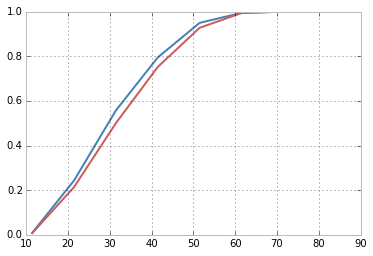

In [9]:
#print df.ageS, df.ageS.cumsum()
bins = np.arange(0, 99, 10)

cs1=df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero]).cumsum()

cs2=df.ageL.groupby(pd.cut(df.ageL, bins)).agg([count_nonzero]).cumsum()


pl.plot(bins[:-1]+1.5, cs1/cs1.max())
pl.plot(bins[:-1]+1.5, cs2/cs2.max())


40.0428597555 11.5737949068
0.0344694444315 0.0323810463668 0.0344051730666
0.930715548076


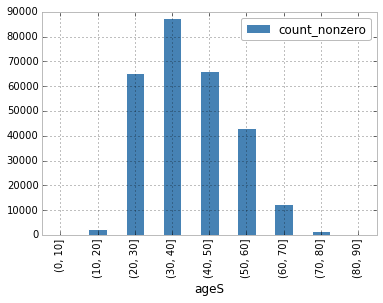

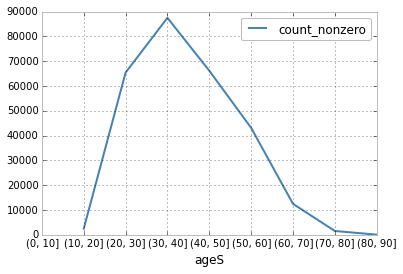

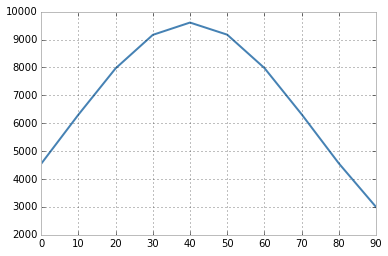

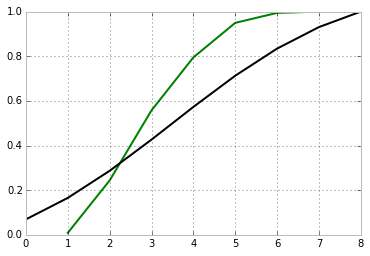

In [10]:
#print df.ageS, df.ageS.cumsum()
bins = np.arange(0, 99, 10)
cs1=df.ageS.groupby(pd.cut(df.ageS, bins)).agg([count_nonzero])

cs1.plot(kind='bar')
m=np.nanmean(df.ageS)
s=np.std(df.ageS)
print m, s
def model( x) : 
    return 1./(s*np.sqrt(2*np.pi))*exp(-((x-m)/2./2./s)**2)

print model(m), model(m-s), model(m+2)


cs1.plot()
pl.figure()
pl.plot(bins,np.vectorize(model)(bins)*np.nansum(cs1))
pl.figure()
pl.plot(cs1.cumsum()/cs1.cumsum().max(),'g')
pl.plot(model(bins[:-1]).cumsum()/model(bins[:-1]).cumsum().max(),'k')

KS=np.nanmax(np.array(cs1.cumsum()/cs1.cumsum().max())-np.array(model(bins[:-1]).cumsum()/model(bins[:-1]).cumsum().max()))
print KS

In [11]:
import scipy.stats

In [12]:
print cs1.count_nonzero
A, crit, sig = scipy.stats.anderson(df.ageS[~np.isnan(df.ageS)], dist='norm')
print A, crit, sig
A, crit, sig = scipy.stats.anderson(np.random.randn(1000), dist='norm')
print A, crit, sig
A, crit, sig = scipy.stats.anderson(np.random.chisquare(1000,10000), dist='norm')
print A, crit, sig

ageS
(0, 10]       NaN
(10, 20]     2466
(20, 30]    65411
(30, 40]    87486
(40, 50]    66152
(50, 60]    43130
(60, 70]    12478
(70, 80]     1544
(80, 90]       58
Name: count_nonzero, dtype: float64
2724.31470415 [ 0.576  0.656  0.787  0.918  1.092] [ 15.   10.    5.    2.5   1. ]
0.107323048377 [ 0.574  0.653  0.784  0.914  1.088] [ 15.   10.    5.    2.5   1. ]
2.44722285437 [ 0.576  0.656  0.787  0.918  1.092] [ 15.   10.    5.    2.5   1. ]


In [13]:
ks=scipy.stats.kstest(df.ageS[~np.isnan(df.ageS)],'norm')
print ks
print ""
ks = scipy.stats.kstest(np.random.randn(1000), 'norm')
print ks
print ""
ks = scipy.stats.kstest(np.random.chisquare(1000,10000), 'norm')
print ks
print ""
ks = scipy.stats.kstest(np.random.poisson(10,10000), 'norm')
print ks
print ""


(1.0, 0.0)

(0.021030942649038153, 0.76833425840286551)

(1.0, 0.0)

(0.99645010196836992, 0.0)



5.94362851479e+151


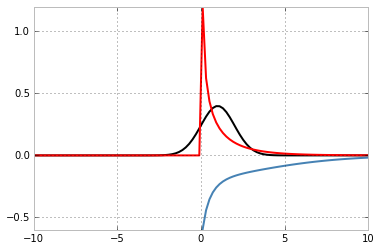

In [14]:
q = lambda x, mu : scipy.stats.distributions.norm.pdf(x-mu)
p = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
Dkl = lambda x ,mu :  p(x, mu)* np.log10(q(x, mu))+p(x, mu) *np.log10(p(x, mu))

x=np.linspace(-10,10,100)
pl.plot(x,q(x,1), 'k')
pl.plot(x, p(x,1), 'r')
pl.plot(x,Dkl(x,1))
print np.nansum(Dkl(np.linspace(0,30,1000), 1))


-60.0531063492


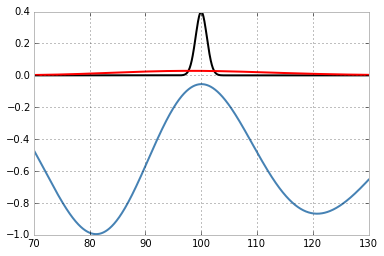

In [15]:
x=np.linspace(70,130,1000)
x=np.linspace(70,130,1000)
pl.plot(x,q(x, 100), 'k')
pl.plot(x, p(x, 100), 'r')
pl.plot(x,Dkl(x, 100))
print np.nansum(Dkl(np.linspace(70,130,100), 100))